# TKO_7092 Evaluation of Machine Learning Methods 2026

## Exercise 3

---

Student name: Anton Teerioja  

Student number: 2214231

Student email: asteer@utu.fi

---

## IMPORTANT

This exercise involves using AI. Use only the *Study Chat* service provided by the University of Turku at [https://ai.utu.fi/en](https://ai.utu.fi/en). **Do not use any other AI service!** Before starting, remember to carefully read the guidelines for using AI ([https://intranet.utu.fi/en/sites/ai/guidelines/Pages/default.aspx](https://intranet.utu.fi/en/sites/ai/guidelines/Pages/default.aspx)) and the terms of use. **Do not share any personal information or copyrighted material with AI.**

Save all your discussions (including your prompts and AI's output) as well as the name of the model you used.

## Instructions

The deadline of this exercise is **Wednesday 18 February 2026 at 11:59 PM**. Please contact Juho Heimonen (juaheim@utu.fi) if you have any questions about the exercise. Remember to follow all the general exercise guidelines that are stated in Moodle.

The exercise has several parts, all of which concern the letter below. You will take the role of a data scientist who has been assigned to solve the problem described in the letter. You have an AI tool to assist you, but you alone are responsible for the quality of the solution.

#### 1

Ask AI to write code to solve the task. Analyse which parts of the AI-generated code are correct and which are incorrect. Pay particular attention to the key parts of the cross-validation. You may ask AI to improve the code as many times as you like, as long as you keep analysing its output.

#### 2

Implement the required leave-one-out cross-validations and run your code to get the estimates you were asked to obtain. Here it is okay to use any amount of the AI-generated code you produced above. You can use a complete, fully correct AI-written solution, you can write the implementation from scratch by yourself, or you can take some AI-generated code and complete the implementation manually.

#### 3

Write a report in which you discuss the following:

- Why did the cross-validation described in the letter fail? What is the correct way to do cross-validation here?

- Which parts of the task was AI able to code correctly and which not? Focus particularly on the core of the cross-validation.

- Which parts of the AI-generated code did you use in your implementation? Why? Explain why the selected pieces of code work correctly in your implementation.

- What results did you get with your implementation? Report the estimates and interpret the results in terms of how well the model will work in the situations described in the letter. Explain in detail why your cross-validation is the correct way to estimate the generalisation performance.

Write the report in your own words and explain everything clearly, precisely, and comprehensively. **You are not allowed to use AI to write the report for you** because this is where you show that you have understood the theory and are able to apply it. If you use AI as a teacher (i.e. to explain things to you for learning purposes), you must attach the discussions and clearly state what and how you learnt from the AI. **If there is uncertainty about how the text was produced, you may be required to explain the content of your report in a face-to-face meeting.**

#### 4

Submit the following documents to Moodle:

- The discussions with AI (including your prompts and AI's output), as PDF.

- The implementation of your cross-validation, as PDF and as a Jupyter notebook.

- The report, as PDF. (It is okay to integrate the report to the Jupyter notebook.)

Note that it is not enough to just implement the cross-validation correctly to pass this exercise. You must also explain in plain words what you have done and demonstrate that you understand how cross-validation should be performed on pair-input data. Small errors are acceptable, but you will fail this exercise if there are significant error(s) or omission(s) in the report or in the implementation.

## Letter from your client

Dear Data Scientist,

I have a long-term research project regarding a specific set of proteins. I am attempting to discover small organic compounds that can bind strongly to these proteins and thus act as drugs. I have already made laboratory experiments to measure the affinities between some proteins and drug molecules.

My colleague is working on another set of proteins, and the objectives of his project are similar to mine. He has recently discovered thousands of new potential drug molecules. He asked me if I could find the pairs that have the strongest affinities among his proteins and drug molecules. Obviously I do not have the resources to measure all the possible pairs in my laboratory, so I need to prioritise. I decided to do this with the help of machine learning, but I have encountered a problem.

Here is what I have done so far: First I trained a K-nearest neighbours regressor with the parameter value K=10 using all the 400 measurements I had already made in the laboratory with my proteins and drug molecules. They comprise of 77 target proteins and 59 drug molecules. To estimate the generalisation performance of the model, I then performed a leave-one-out cross-validation. I used C-index and got a stellar score above 90%. Finally I used the model to predict the affinities of my colleague's proteins and drug molecules. The problem is that when I selected the highest predicted affinities and my colleague tried to verify them in the lab, we found that many of them are much lower in reality. My model clearly does not work despite the high cross-validation score. We also tested the model with my proteins against my colleague's drugs (which is another task I would like to use my model for), but the model did not work there either.

Please explain why my estimation failed and how leave-one-out cross-validation should be performed to get reliable estimates. Also, please implement the leave-one-out cross-validation correctly and report the numbers I need. I want to know whether it would be a waste of my colleague's and my resources if we were to use my model any further.

The data I used to create my model is available in the files `input.data`, `output.data` and `pairs.data` for you to use. The first file contains the features of the pairs, whereas the second contains their affinities. The third file contains the identifiers of the drug and target molecules of which the pairs are composed. The files are paired, i.e. the i<sup>*th*</sup> row in each file is about the same pair.

Looking forward to hearing from you soon.

Yours sincerely, \
Bio Scientist


In [27]:
#Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
#From Exercise 2
def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n

#Reading the data and formatting it.
y_true = pd.read_csv('output.data', header=None)
X = pd.read_csv('input.data', header=None).to_numpy()
X_formatted = []

for x in X:
  values = []
  for y in x[0].split():
    values.append(float(y))
  
  X_formatted.append(values)

X = pd.DataFrame(X_formatted)

#Scaling the X values for KNeighbors algorithm, the AI missed this step
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

coordinates = pd.read_csv('pairs.data', header=None)
indexes = []

for coord in coordinates[0]:
  coord = str(coord).split()
  row = int(coord[0].strip('"')[1:])
  col = int(coord[1].strip('"')[1:])
  indexes.append((row, col))

indexes = pd.DataFrame(indexes)

labels = pd.concat([y_true, indexes], axis=1)
labels.columns = ['value', 'row', 'column']

#In the end we have the scaled values X, and a dataframe labels which has the true labels and the coordinates for the rows.

In [ ]:
#This part was generated by CLAUDE-3-7-SONNET-20250219
#The code generated works correctly but it is in a verbose form so error checking took a long time

def custom_loocv_knn_structured(df, X, row_col='row', col_col='column', value_col='value', n_neighbors=5):
    """
    Custom LOOCV algorithm with KNeighbors regression for structured DataFrame with float data.
    
    Parameters:
    -----------
    df : DataFrame
        DataFrame containing the structured data with row and column identifiers and values
    X : array-like of shape (n_samples, n_features)
        The float feature data with 400 rows, where each row contains multiple values
    row_col : str, default='row'
        Column name in df containing row identifiers
    col_col : str, default='column'
        Column name in df containing column identifiers
    value_col : str, default='value'
        Column name in df containing the values/labels
    n_neighbors : int, default=5
        Number of neighbors for KNeighborsRegressor
        
    Returns:
    --------
    dict: Dictionary containing results for all iterations
    """
    # Convert to pandas DataFrame if it's not already
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)
    
    # Convert X to numpy array if it's not already
    if isinstance(X, pd.DataFrame):
        X = X.values
    
    # Extract target values
    y = df[value_col].values
    
    n_samples = len(df)
    
    # Initialize arrays to store predictions for each iteration
    predictions = {
        'iter1': np.zeros(n_samples),
        'iter2': np.zeros(n_samples),
        'iter3': np.zeros(n_samples),
        'iter4': np.zeros(n_samples)
    }
    
    # Store indices where prediction was possible
    valid_indices = {
        'iter1': [],
        'iter2': [],
        'iter3': [],
        'iter4': []
    }
    
    # Iteration 1: Normal LOOCV (leave one data point out)
    for i in range(n_samples):
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        X_test = X[i].reshape(1, -1)
        
        # Only fit model if we have enough training samples
        if len(y_train) >= n_neighbors:
            model = KNeighborsRegressor(n_neighbors=min(n_neighbors, len(y_train)))
            model.fit(X_train, y_train)
            predictions['iter1'][i] = model.predict(X_test)[0]
            valid_indices['iter1'].append(i)
    
    # Iteration 2: For each test point, remove all entries with matching row identifier
    for i in range(n_samples):
        test_row_id = df.iloc[i][row_col]
        
        # Find indices to exclude (test point and all with same row id)
        indices_to_exclude = df.index[df[row_col] == test_row_id].tolist()
        
        # Create training data excluding those indices
        X_train = np.delete(X, indices_to_exclude, axis=0)
        y_train = np.delete(y, indices_to_exclude)
        X_test = X[i].reshape(1, -1)
        
        # Only fit model if we have enough training samples
        if len(y_train) >= n_neighbors:
            model = KNeighborsRegressor(n_neighbors=min(n_neighbors, len(y_train)))
            model.fit(X_train, y_train)
            predictions['iter2'][i] = model.predict(X_test)[0]
            valid_indices['iter2'].append(i)
    
    # Iteration 3: For each test point, remove all entries with matching column identifier
    for i in range(n_samples):
        test_col_id = df.iloc[i][col_col]
        
        # Find indices to exclude (test point and all with same column id)
        indices_to_exclude = df.index[df[col_col] == test_col_id].tolist()
        
        # Create training data excluding those indices
        X_train = np.delete(X, indices_to_exclude, axis=0)
        y_train = np.delete(y, indices_to_exclude)
        X_test = X[i].reshape(1, -1)
        
        # Only fit model if we have enough training samples
        if len(y_train) >= n_neighbors:
            model = KNeighborsRegressor(n_neighbors=min(n_neighbors, len(y_train)))
            model.fit(X_train, y_train)
            predictions['iter3'][i] = model.predict(X_test)[0]
            valid_indices['iter3'].append(i)
    
    # Iteration 4: For each test point, remove entries with matching row OR column identifier
    for i in range(n_samples):
        test_row_id = df.iloc[i][row_col]
        test_col_id = df.iloc[i][col_col]
        
        # Find indices to exclude (test point and all with same row or column id)
        row_matches = df.index[df[row_col] == test_row_id].tolist()
        col_matches = df.index[df[col_col] == test_col_id].tolist()
        indices_to_exclude = list(set(row_matches + col_matches))  # Remove duplicates
        
        # Create training data excluding those indices
        X_train = np.delete(X, indices_to_exclude, axis=0)
        y_train = np.delete(y, indices_to_exclude)
        X_test = X[i].reshape(1, -1)
        
        # Only fit model if we have enough training samples
        if len(y_train) >= n_neighbors:
            model = KNeighborsRegressor(n_neighbors=min(n_neighbors, len(y_train)))
            model.fit(X_train, y_train)
            predictions['iter4'][i] = model.predict(X_test)[0]
            valid_indices['iter4'].append(i)
    
    # Calculate performance metrics only for valid predictions
    results = {}
    for iter_name, pred_array in predictions.items():
        valid_idx = valid_indices[iter_name]
        if len(valid_idx) > 0:
            results[iter_name] = {
                'predictions': pred_array,
                'valid_indices': valid_idx,
                'mse': mean_squared_error(y[valid_idx], pred_array[valid_idx]),
                'r2': r2_score(y[valid_idx], pred_array[valid_idx]),
                'n_valid_predictions': len(valid_idx),
                'pct_valid': 100 * len(valid_idx) / n_samples
            }
        else:
            results[iter_name] = {
                'predictions': pred_array,
                'valid_indices': [],
                'mse': None,
                'r2': None,
                'n_valid_predictions': 0,
                'pct_valid': 0
            }
    
    return results

In [ ]:
#This part was generated by CLAUDE-3-7-SONNET-202502197
#This part is just the parameters for the LOOCV-algorithm and KNeighbors model.
results = custom_loocv_knn_structured(
    df=labels, 
    X=X,  # Pass the float feature data separately
    row_col='row',
    col_col='column',
    value_col='value',
    n_neighbors=10
)

In [ ]:
#This part was generated by CLAUDE-3-7-SONNET-20250219
#Here the result is parsed with the true labels to get performance metrics from the data
for iter_name, metrics in results.items():
    valid_idx = metrics['valid_indices']
    
    if len(valid_idx) > 0:
        # Calculate and store C-index
        results[iter_name]['c_index'] = cindex(y_true[0][valid_idx], metrics['predictions'][valid_idx])

# Print comprehensive results
for iteration, metrics in results.items():
    print(f"\n{iteration}:")
    print(f"MSE: {metrics['mse']:.4f}")
    print(f"R²: {metrics['r2']:.4f}")
    if 'c_index' in metrics:
        print(f"C-index: {metrics['c_index']:.4f}")
    print(f"Valid predictions: {metrics['n_valid_predictions']}/{len(labels)} ({metrics['pct_valid']:.1f}%)")

all_true_values = []
all_predictions = []

for iter_name, metrics in results.items():
    valid_idx = metrics['valid_indices']
    if len(valid_idx) > 0:
        all_true_values.extend(y_true[0][valid_idx])
        all_predictions.extend(metrics['predictions'][valid_idx])

# Calculate one overall C-index
overall_c_index = cindex(np.array(all_true_values), np.array(all_predictions))
print(f"\nOverall C-index across all iterations: {overall_c_index:.4f}")


iter1:
MSE: 0.0154
R²: 0.7327
C-index: 0.8293
Valid predictions: 400/400 (100.0%)

iter2:
MSE: 0.0751
R²: -0.3068
C-index: 0.5133
Valid predictions: 400/400 (100.0%)

iter3:
MSE: 0.0154
R²: 0.7329
C-index: 0.8292
Valid predictions: 400/400 (100.0%)

iter4:
MSE: 0.0748
R²: -0.3016
C-index: 0.5134
Valid predictions: 400/400 (100.0%)

Overall C-index across all iterations: 0.6626


In [ ]:
#This part was generated by CLAUDE-3-7-SONNET-20250219
#This prints four scatterplots for each iteration of the cross-validation

def plot_scatter_comparison(results, y_true):
    """Create scatter plots comparing true vs predicted values with C-index."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    iterations = ['iter1', 'iter2', 'iter3', 'iter4']
    
    for i, iter_name in enumerate(iterations):
        valid_idx = results[iter_name]['valid_indices']
        y_pred = results[iter_name]['predictions'][valid_idx]
        y_true_valid = y_true[0][valid_idx]
        
        # Calculate C-index
        c_idx = cindex(y_true_valid, y_pred)
        
        # Plot
        ax = axes[i]
        ax.scatter(y_true_valid, y_pred, alpha=0.6)
        
        # Plot perfect prediction line
        min_val = min(np.min(y_true_valid), np.min(y_pred))
        max_val = max(np.max(y_true_valid), np.max(y_pred))
        ax.plot([min_val, max_val], [min_val, max_val], 'r--')
        
        ax.set_title(f"Iteration {i+1}: C-index = {c_idx:.3f}")
        ax.set_xlabel("True Values")
        ax.set_ylabel("Predicted Values")
        
    plt.tight_layout()
    plt.savefig('c_index_scatter_comparison.png', dpi=300)
    plt.show()

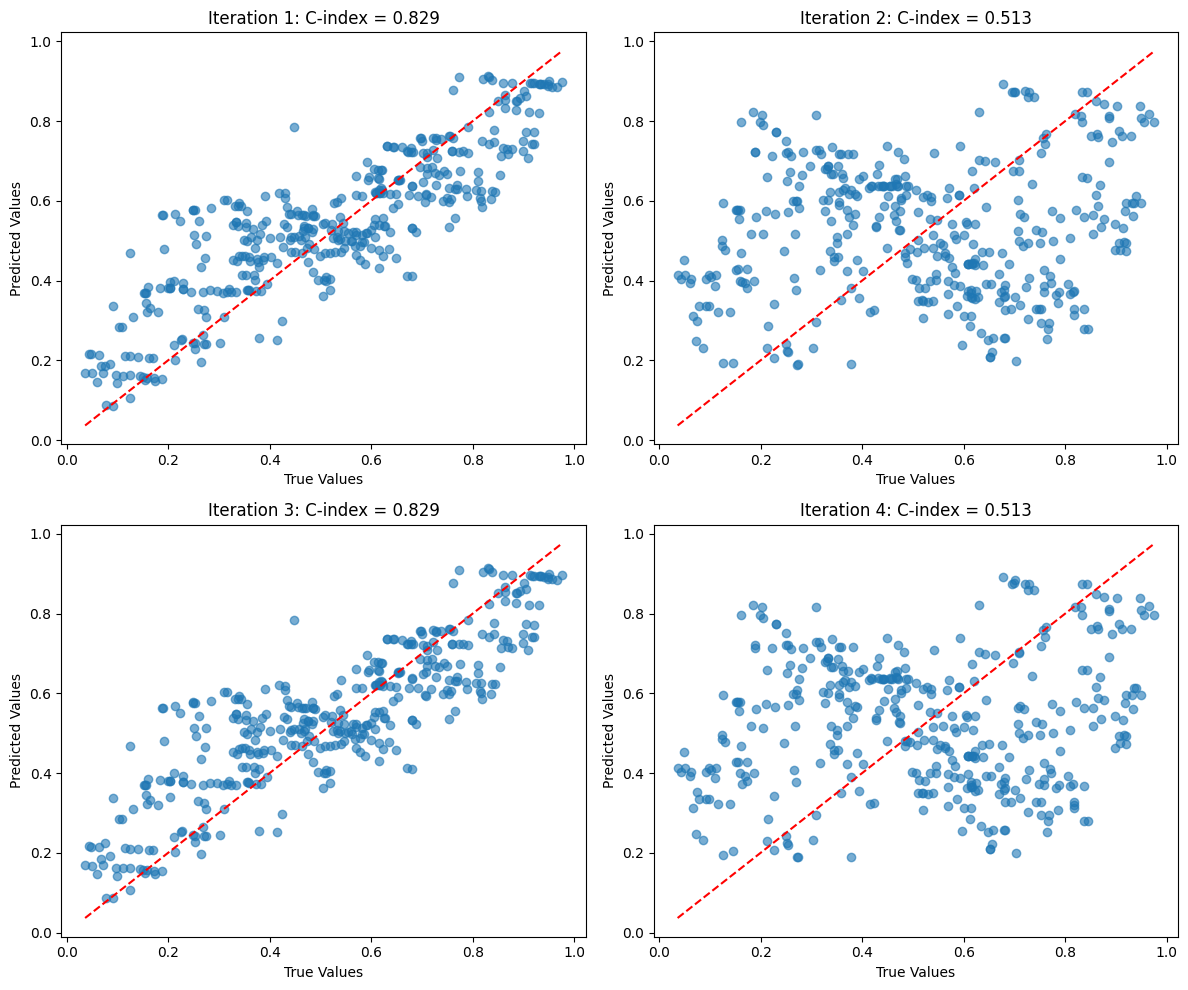

In [ ]:
#This part was generated by CLAUDE-3-7-SONNET-20250219
plot_scatter_comparison(results, y_true)

#### 1
I had three seperate chats with CLAUDE-3-7-SONNET-20250219. In the end the first two chats weren't that helpfull as I had missunderstood the assignment so the result of the AI was automatically going to be wrong. I took some pointers from those chats on how the data could be preprocessed and I got rid of the matrixes and had the data in dataframes. The last discussion was more focused on the LOOCV implementation. I didn't need to discuss it much with the AI as the resulting code worked very well out of the box. I did write a comprehensive prompt to achieve this outcome and I also checked the generated code and it did work as intended.

The hardest part with working with the AI was that it made assumptions about the problem and implemented it in the code automatically. This caused some annoyances and required multiple repromts and more copy-pasting. Troubleshooting takes a long time if you copy and paste large ammounts of complex code from AI. Using AI to solve simple and well defined problems seems to work without too much repromting, but the more complex the outcome the more time you need to take to analyze the code and write a comprehensive prompt for the AI.

#### 2
There are large parts of the problem solution that are AI generated. I did the data preprocessing and scaling, which the AI didn't know to do. When the data was prepared, it was much more easy to get the AI to solve the LOOCV implementation.

#### 3
The cross-validation from the letter failed because it didn't take into account the dependencies of the pair-input data. This is also the result of the first iteration of the new LOOCV implementation where the cross-validation is done normally. The result is too optimistic for the data, which is the reason the experiments made, based on the model, failed. The correct way is to split the cross-validation into four categories and do four seperate cross-validation accordingly. The categories are A, B, C and D and for each the test set needs to be formed differently. With B the matching rows are removed and with C the matching columns are removed. For D both columns and rows are removed.

AI was able to take the preprocessed data and format the custom LOOCV implementatio when the prompt was detailed enough. The easiest parts for the AI were the post-processing parts so making diagrams and presenting the results of the algorithm. The data preprocessing was also difficult for the AI and it forgot some crucial steps like scaling the data for a location dependent algorithm. In the big picture the AI makes assumptions that the data is formatted in a certain way and when it is corrected, it tends to forget the previous requirements for the task.

I used the custom LOOCV algorithm and the the results that it gave. I usually wouldn't copy anything straight from the AI, but I wanted to try it for this task. The implementation works, that is why I used it. The algorithm works because I inspected it and it does remove the correct columns and rows when necessary and for each seperate test-point and in the end it gathers the results correctly and in a format that is easy to use for analysis.

My results were mixed. The A and C iteration gave good results with a C-index value of over 0.8. The B and D iteration didn't produce workable models with C-index values of about 0.5, which is no better than guessing. The total C-index value was 0.66, which isn't a good result. I don't think this model should be used for additional analysis with real world resources as it doesn't produce a good enough estimate. My implementation of the cross-validation does the cross-validation four times. Each time corresponds to the types of data that is found in pair-input data. The first type assumes that all of the points are in the in-sample data. This means that the cross-validation works as it would work normally. The second type assumes that the data point is Out-of-sample with it not sharing the 1st member with any other datapoint. This means that for each test-point all of the points on the same row are removed. The third type is also out-of-sample with it not sharing the 2nd member with any other datapoint. This means that for each test-point all of the points on the same column are removed. For the last case the out-of-sample data doesn't share the 1st or the 2nd member. This means that ofr each test-point all of the points on the same column and row are removed. These four cross-validation ensure that the model can accurately predict all different types of pair-input data.